<font color='red'>Question 2.1:</font> What are supervised learning and unsupervised learning?

Supervised machine learning is generally used to classify data or make predictions, whereas unsupervised learning is generally used to understand relationships within datasets. 

Supervised learning, as the name indicates, has the presence of a supervisor as a teacher. Basically supervised learning is when we teach or train the machine using data that is well labelled. Which means some data is already tagged with the correct answer. After that, the machine is provided with a new set of examples(data) so that the supervised learning algorithm analyses the training data(set of training examples) and produces a correct outcome from labelled data.
Unsupervised learning is the training of a machine using information that is neither classified nor labeled and allowing the algorithm to act on that information without guidance. Here the task of the machine is to group unsorted information according to similarities, patterns, and differences without any prior training of data. 

<font color='red'>Assignment 2.1:</font> Load 'cluster_data.csv' and visualize the data. How many clusters do you think it has?

In [1]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")

%autosave 100

Autosaving every 100 seconds


In [2]:
import pandas as pd

import numpy as np

import seaborn

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import pandas as pd
df = pd.read_csv('cluster_data.csv')

In [4]:
df.head()

x         y
0  -81.813522 -8.072301
1  -66.353560 -8.760227
2  -65.725456 -8.833906
3 -106.446292 -3.051862
4 -100.364080 -5.569121

Text(0.5, 0, 'X')

Text(0, 0.5, 'Y')

Text(0.5, 1.0, 'Data Points')

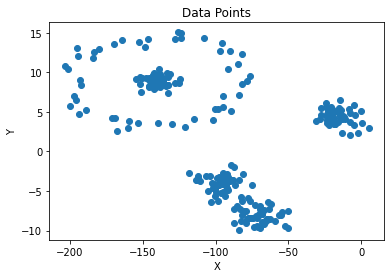

In [6]:
plt.scatter(df.x, df.y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data Points')
plt.show()

<font color='red'>Assignment 2.2:</font> Train a **KMeans** model.

In [8]:
X=df.values

In [12]:
from sklearn.cluster import KMeans
model = KMeans()
model.fit(X)

KMeans()

In [13]:
print(model.cluster_centers_)
print(model.labels_)

[[-159.12919976    7.64908779]
 [-100.32842142   -2.96055302]
 [ -15.63288891    4.42668036]
 [-137.70942222    9.23871176]
 [ -81.59728128   -6.44364871]
 [-193.17231286    9.30382531]
 [ -64.28783145   -8.25263849]
 [ -87.69307603    9.59642543]]
[4 6 6 1 1 4 1 4 4 6 6 4 1 6 2 4 1 1 1 2 4 2 2 2 4 2 2 1 2 4 1 6 6 2 6 2 4
 2 2 6 2 1 1 4 6 1 1 2 6 6 1 2 2 4 1 1 2 2 2 4 6 2 6 1 1 1 1 1 6 2 1 1 4 2
 4 2 4 1 4 4 1 4 4 6 4 1 1 1 2 2 6 6 2 2 2 2 2 2 1 6 1 2 4 2 2 2 2 4 4 6 4
 2 1 2 6 1 6 6 1 1 4 2 6 6 1 1 1 2 2 2 2 1 4 2 2 6 1 2 2 2 6 6 6 4 2 2 1 4
 4 1 3 3 0 0 3 0 0 3 3 3 3 3 3 3 3 0 5 7 3 3 7 0 3 3 5 0 3 5 1 3 3 3 3 3 3
 3 7 3 5 0 3 3 3 3 0 1 7 3 5 3 1 3 5 7 3 7 5 3 7 3 5 3 0 1 7 3 1 3 7 3 3 5
 3 3 7 3 3 3 3 0 5 5 3 5 5 3 5 7 3 3 7 0 3 3 7 3 3 0 3 0]


<font color='red'>Assignment 2.3:</font> Visualize the clustering results. **Hint:** use Kmeans.labels_ and plt.scatter(x, y, c="put_your_label_data_here").

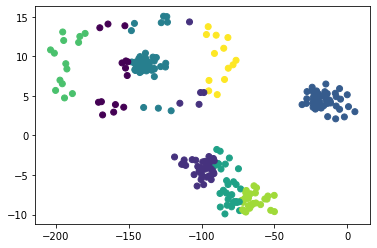

In [14]:
 plt.scatter(df.x, df.y, c=model.labels_)

<font color='red'>Question 2.2:</font> Is the result what you expect? Why?

From above plot, it looks like we have 3 clear clusters but algorithm has created more clusters.

Being an unsupervised learning algorithm, K-Means doesn't know how many clusters exist in the data.The model just tries to find the clusters that minimize the sum of squared distances between the data points and their assigned centroids.

The model gave me 8 clusters because the data may have more than 4 natural clusters. Because data has complex structure and contains overlapping clusters, it's possible that K-means found more than 4 distinct clusters.

The initialization of centroids may have also affected the results: K-means is sensitive to the initialization of centroids, and different initializations can lead to different results. If the initialization was not optimal, K-means may have found more clusters.

<font color='red'>Assignment 2.4:</font> Rescale the data then train KMeans.

In [15]:
from sklearn.preprocessing import StandardScaler

# Rescale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the KMeans model with k=3 clusters on the scaled data
kmeans = KMeans()
kmeans.fit(X_scaled)

# Print the cluster centers and the labels of the data points
print(kmeans.cluster_centers_)
print(kmeans.labels_)

KMeans()

[[ 0.4362742  -1.41106432]
 [-0.93727645  0.99301641]
 [ 1.51301546  0.32938618]
 [-0.07972511 -0.84217722]
 [-0.2277355   1.55747557]
 [-1.85397596  1.33897316]
 [-1.60261456  0.34317232]
 [-0.08895197  0.53961595]]
[0 0 0 3 3 3 3 0 0 0 0 0 3 0 2 3 3 3 3 2 0 2 2 2 0 2 2 3 2 0 3 0 0 2 0 2 3
 2 2 0 2 3 3 3 0 3 3 2 0 0 3 2 2 0 3 3 2 2 2 0 0 2 0 3 3 3 3 3 0 2 3 3 3 2
 3 2 0 3 0 3 3 0 0 0 0 3 3 3 2 2 0 0 2 2 2 2 2 2 3 0 3 2 0 2 2 2 2 3 0 0 0
 2 3 2 0 3 0 0 3 3 0 2 0 0 3 3 3 2 2 2 2 3 0 2 2 0 3 2 2 2 0 0 0 3 2 2 3 0
 3 3 1 1 6 1 1 5 6 1 1 1 1 7 1 1 1 6 6 7 1 4 4 1 1 1 5 6 1 6 7 6 1 1 1 1 1
 7 7 1 5 6 1 1 1 1 1 7 7 1 5 1 7 1 5 4 1 7 5 1 4 1 6 1 1 7 7 1 4 1 7 1 1 5
 1 1 4 1 1 1 1 1 6 6 4 5 5 1 5 4 1 1 7 5 1 1 4 1 4 1 4 6]


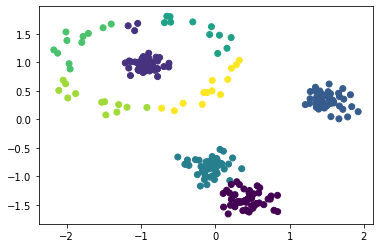

In [16]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=kmeans.labels_)

<font color='red'>Question 2.3:</font> Is the result improved compared with previous result before scaling? Is it able to correctly classify all the clusters? Why? Please describe how **KMeans** works as it relates to the data.

KMeans is sensitive to the scale of the input features, and features with larger magnitudes can dominate the clustering process.
Hence, scaling improves the results.

K-Means uses an iterative technique to group unlabeled data into K clusters based on cluster centers (centroids). The data in each cluster are chosen such that their average distance to their respective centroid is minimized.
Steps:
1.Randomly place K centroids for the initial clusters.
2.Assign each data point to their nearest centroid.
3.Update centroid locations based on the locations of the data points.
Repeat Steps 2 and 3 until points don’t move between clusters and centroids stabilize.

<font color='red'>Question 2.4:</font> What are the important hyperparameters for **KMeans**? How do they affect results?

random_state :
This is setting a random seed. It is useful if we want to reproduce exact clusters over and over again. We can set it to any number we want. 

n_clusters : 
We need to provide the algorithm with the number of clusters that we want. Standard literature suggests we use the elbow method to determine how many clusters we need and it works well for Scikits’ cleaned theoretical datasets. In reality, this is only an initial guess.

init : 
This is where you can set the initial cluster centroids.


<font color='red'>Question 2.5:</font> What information does attribute **inertia_** of **KMeans** provide?

Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

A good model is one with low inertia AND a low number of clusters (K). However, this is a tradeoff because as K increases, inertia decreases.

To find the optimal K for a dataset, use the Elbow method; find the point where the decrease in inertia begins to slow. K=3 is the “elbow” of this graph.

<font color='red'>Assignment 2.5:</font> Plot **inertia_** value versus **n_clusters**.

KMeans(n_clusters=1)

KMeans(n_clusters=2)

KMeans(n_clusters=3)

KMeans(n_clusters=4)

KMeans(n_clusters=5)

KMeans(n_clusters=6)

KMeans(n_clusters=7)

KMeans()

KMeans(n_clusters=9)

KMeans(n_clusters=10)

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'Inertia')

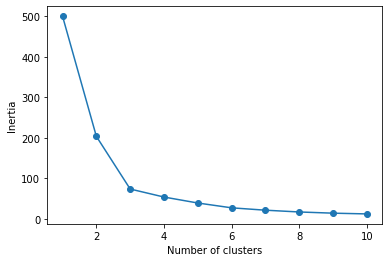

In [18]:
X = X_scaled

# Define a range of values for n_clusters
n_clusters_range = range(1, 11)

# Train multiple KMeans models with different values of n_clusters
inertia_values = []
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot inertia_ versus n_clusters
plt.plot(n_clusters_range, inertia_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()



<font color='red'>Question 2.7:</font> How many clusters should we choose here based on the above plot? Is this the correct choice?

From above graph, we see a bend at n=3. Hence 3 clusters can be our choice.

<font color='red'>Question 2.8:</font> What is **Elbow Method**? Does it always work?

In the Elbow method, we are actually varying the number of clusters ( K ) from 1 – 10. For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value or an optimal number of clusters.

This method, however, is somewhat subjective, as different people may identify the elbow at different locations. 
When the data is high-dimensional or contains noise or outliers, elbow method might not work as it may not be easily identifiable or may not even exist. In such cases, other methods such as the silhouette score or gap statistic may be more appropriate for estimating the optimal number of clusters.

<font color='red'>Assignment 2.6:</font> Train an **AgglomerativeClustering** model instead of KMeans.

In [25]:
from sklearn.cluster import AgglomerativeClustering
from numpy import unique
# define the model
model = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
agg_clust = model.fit(X_scaled)

# retrieve unique clusters
clusters = unique(agg_clust)

<font color='red'>Assignment 2.7:</font> Visualize the clustering results.

<Figure size 720x504 with 0 Axes>

Text(0.5, 1.0, 'Dendrograms')

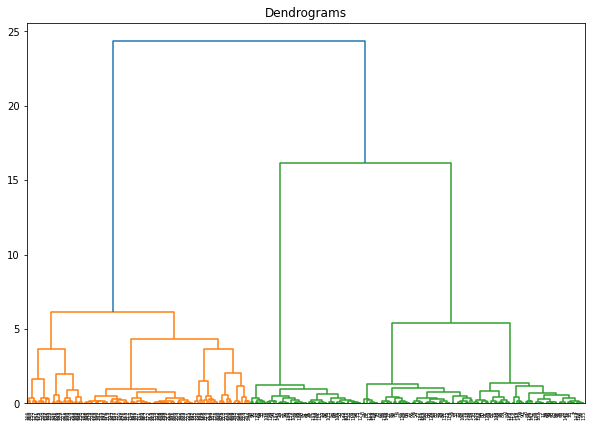

In [26]:
# Dendrogram for Hierarchical Clustering
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_scaled, method='ward'))

<font color='red'>Question 2.9:</font> How does hierarchecial clustering work?

Hierarchical clustering starts by treating each observation as a separate cluster. Then, it repeatedly executes the following two steps: (1) identify the two clusters that are closest together, and (2) merge the two most similar clusters. This iterative process continues until all the clusters are merged together.
The main output of Hierarchical Clustering is a dendrogram, which shows the hierarchical relationship between the clusters.

<font color='red'>Assignment 2.8:</font> Train a **DBSCAN** model.


In [19]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


# Train DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

DBSCAN()

<font color='red'>Assignment 2.9:</font> Visualize the clustering results.

Text(0.5, 1.0, 'Estimated number of clusters: 3')

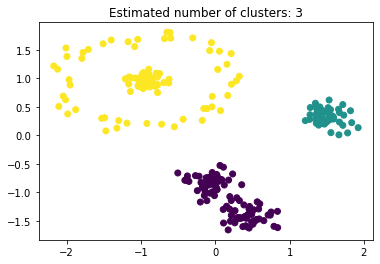

In [20]:
# Plot the clusters
labels = dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

<font color='red'>Bonus Assignment 2.10:</font> Tune hyperparameters to make the clustering results more reasonable.

In [21]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn import metrics

# Train DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

DBSCAN()

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.10, min_samples=2, n_clusters=17, n_noise=44')

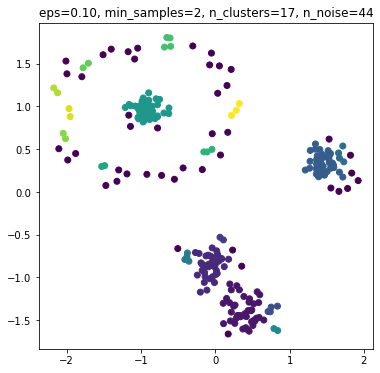

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.10, min_samples=3, n_clusters=10, n_noise=58')

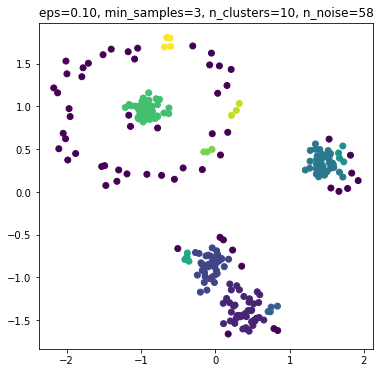

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.10, min_samples=4, n_clusters=7, n_noise=77')

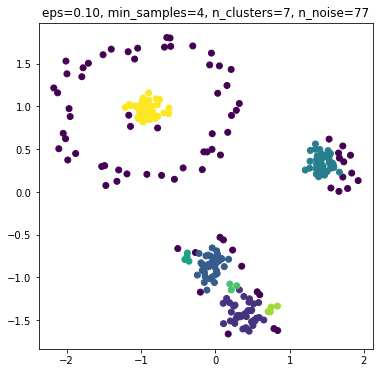

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.10, min_samples=5, n_clusters=6, n_noise=89')

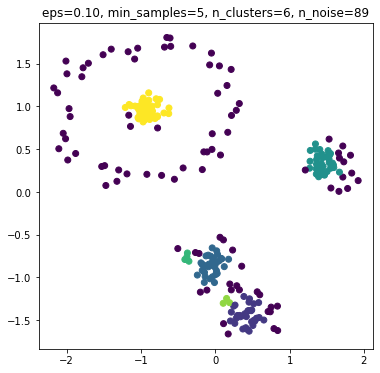

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.10, min_samples=6, n_clusters=4, n_noise=107')

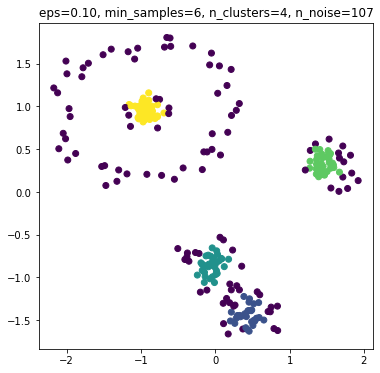

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.10, min_samples=7, n_clusters=4, n_noise=110')

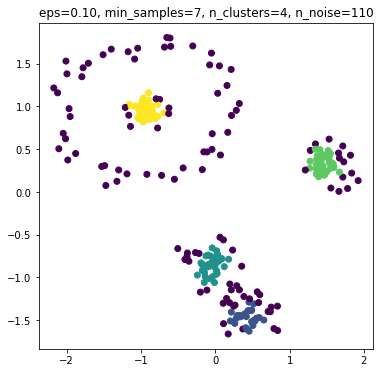

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.10, min_samples=8, n_clusters=5, n_noise=119')

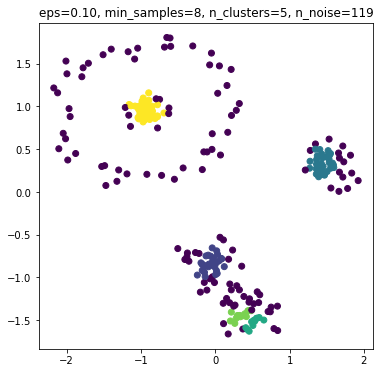

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.10, min_samples=9, n_clusters=5, n_noise=130')

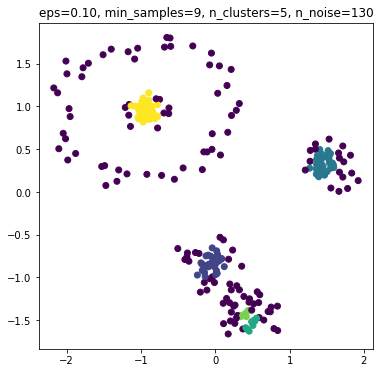

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.20, min_samples=2, n_clusters=17, n_noise=3')

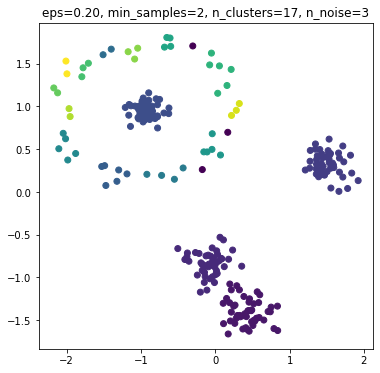

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.20, min_samples=3, n_clusters=13, n_noise=11')

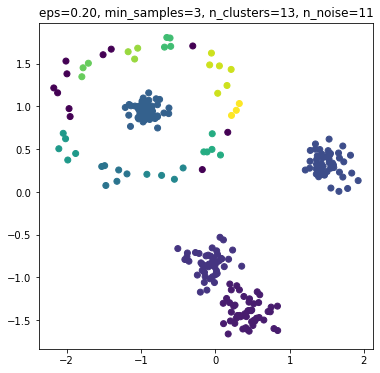

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.20, min_samples=4, n_clusters=9, n_noise=29')

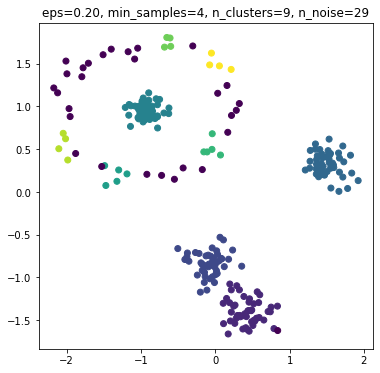

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.20, min_samples=5, n_clusters=5, n_noise=46')

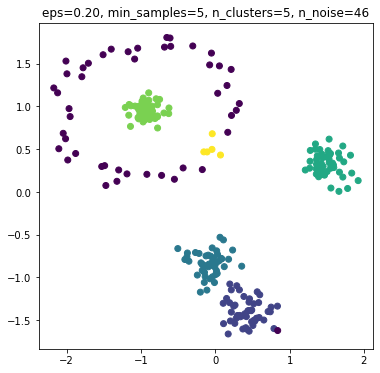

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.20, min_samples=6, n_clusters=4, n_noise=51')

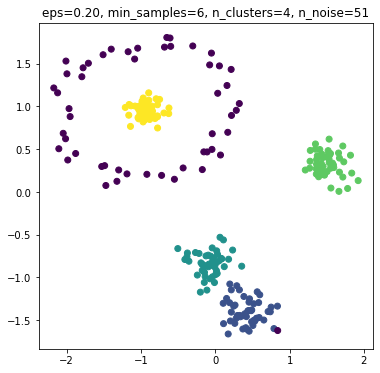

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.20, min_samples=7, n_clusters=4, n_noise=52')

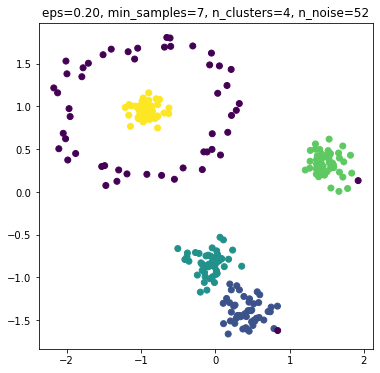

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.20, min_samples=8, n_clusters=4, n_noise=52')

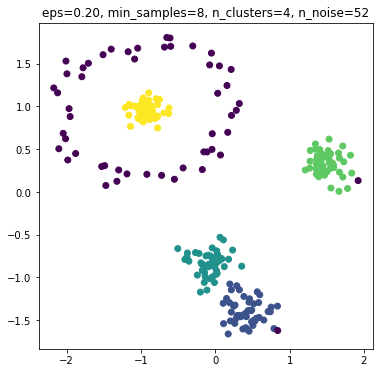

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.20, min_samples=9, n_clusters=4, n_noise=53')

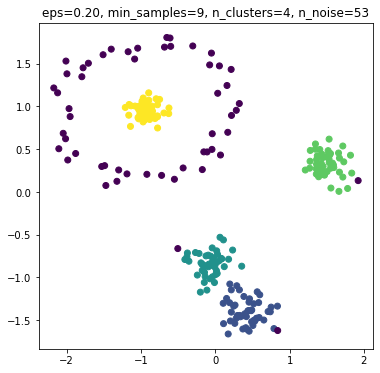

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.30, min_samples=2, n_clusters=5, n_noise=0')

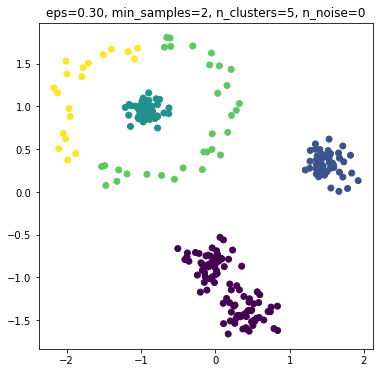

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.30, min_samples=3, n_clusters=5, n_noise=0')

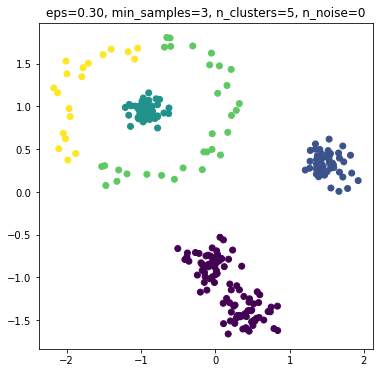

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.30, min_samples=4, n_clusters=8, n_noise=2')

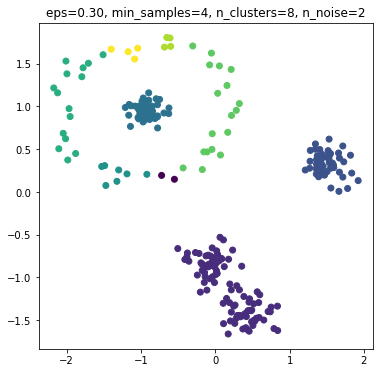

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.30, min_samples=5, n_clusters=9, n_noise=8')

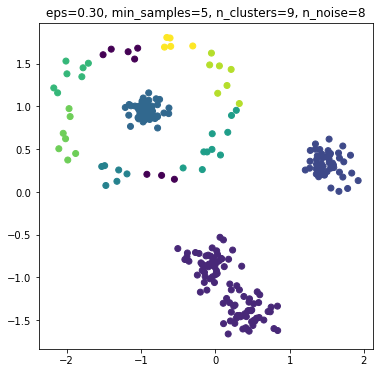

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.30, min_samples=6, n_clusters=7, n_noise=21')

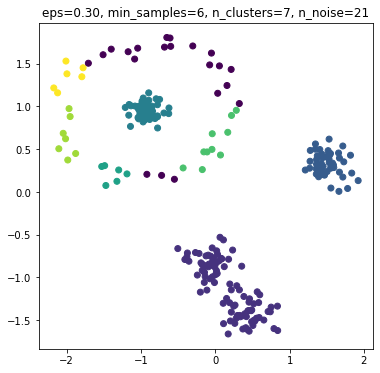

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.30, min_samples=7, n_clusters=4, n_noise=43')

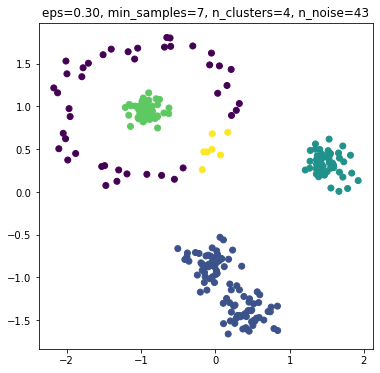

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.30, min_samples=8, n_clusters=3, n_noise=50')

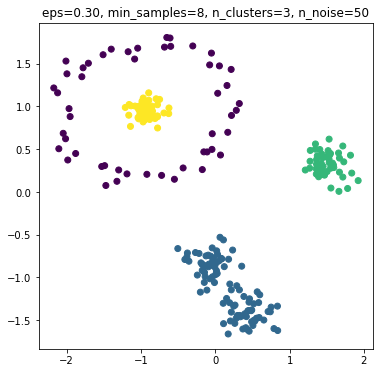

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.30, min_samples=9, n_clusters=3, n_noise=50')

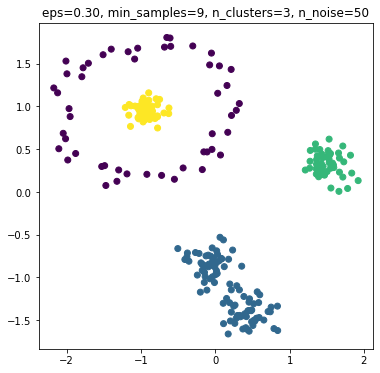

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.40, min_samples=2, n_clusters=4, n_noise=0')

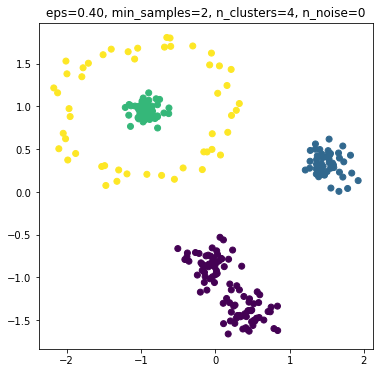

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.40, min_samples=3, n_clusters=4, n_noise=0')

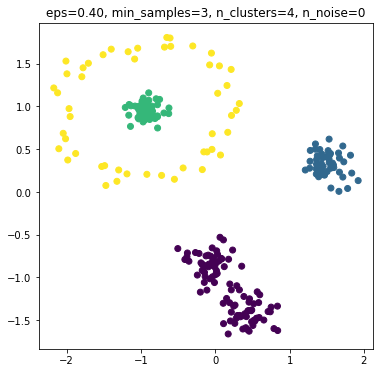

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.40, min_samples=4, n_clusters=4, n_noise=0')

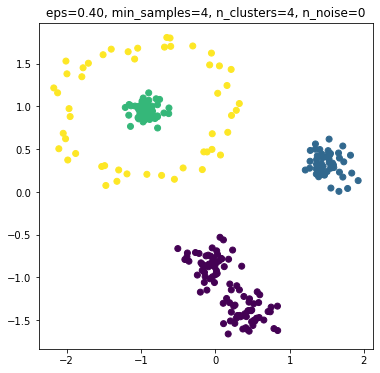

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.40, min_samples=5, n_clusters=4, n_noise=0')

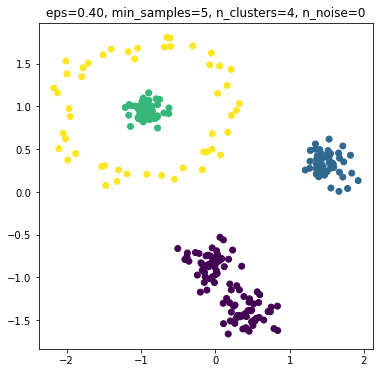

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.40, min_samples=6, n_clusters=5, n_noise=0')

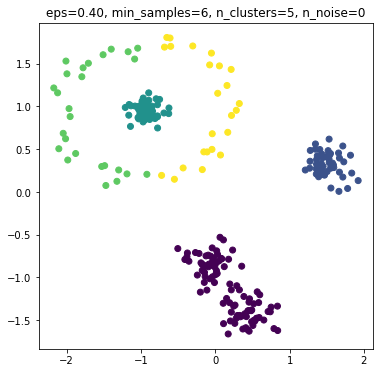

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.40, min_samples=7, n_clusters=7, n_noise=4')

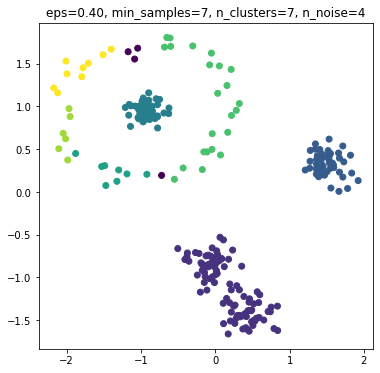

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.40, min_samples=8, n_clusters=6, n_noise=26')

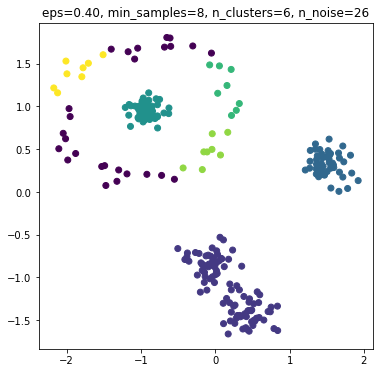

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.40, min_samples=9, n_clusters=4, n_noise=41')

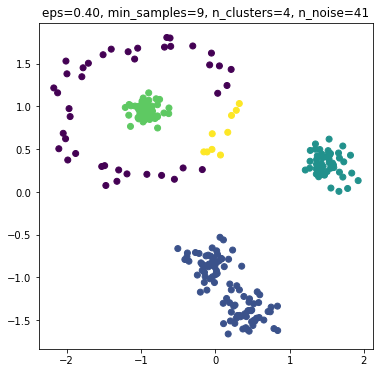

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.50, min_samples=2, n_clusters=3, n_noise=0')

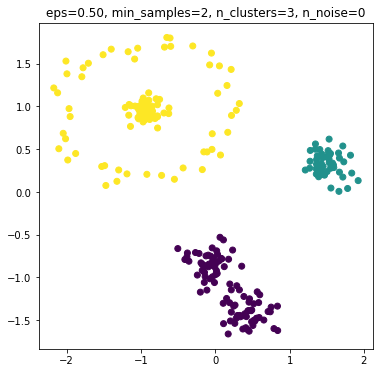

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.50, min_samples=3, n_clusters=3, n_noise=0')

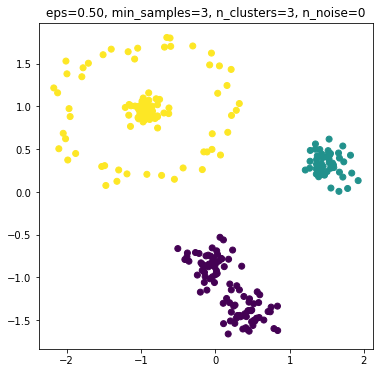

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.50, min_samples=4, n_clusters=3, n_noise=0')

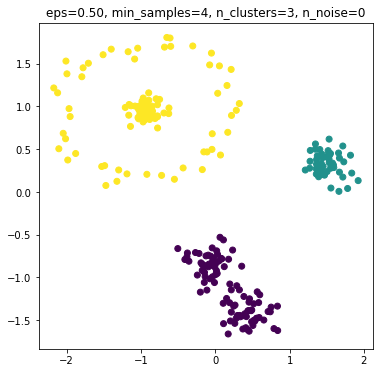

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.50, min_samples=5, n_clusters=3, n_noise=0')

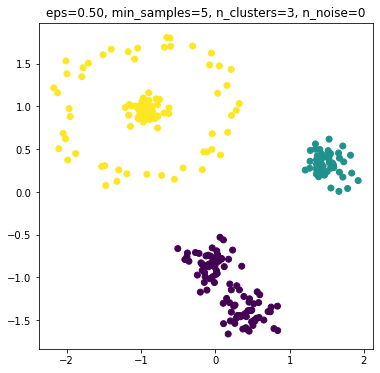

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.50, min_samples=6, n_clusters=3, n_noise=0')

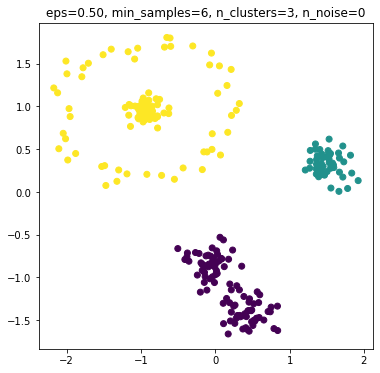

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.50, min_samples=7, n_clusters=3, n_noise=0')

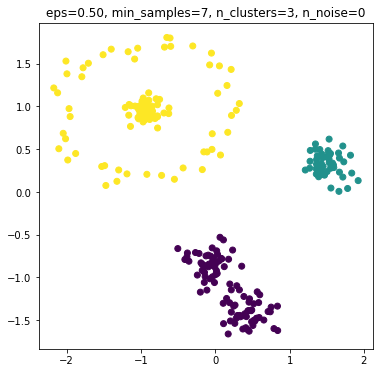

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.50, min_samples=8, n_clusters=4, n_noise=0')

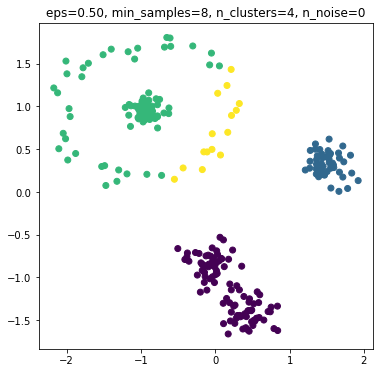

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.50, min_samples=9, n_clusters=6, n_noise=11')

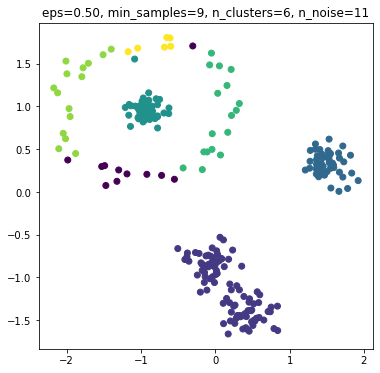

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.60, min_samples=2, n_clusters=3, n_noise=0')

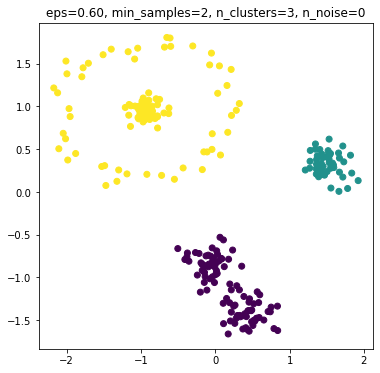

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.60, min_samples=3, n_clusters=3, n_noise=0')

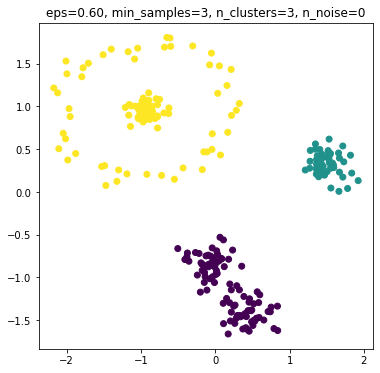

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.60, min_samples=4, n_clusters=3, n_noise=0')

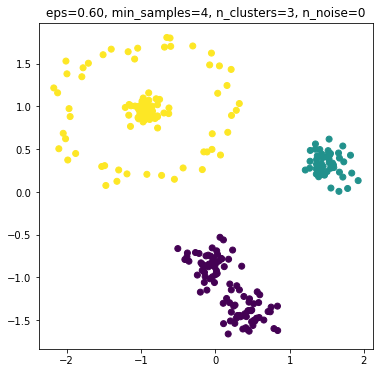

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.60, min_samples=5, n_clusters=3, n_noise=0')

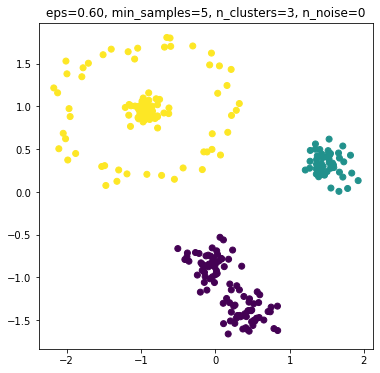

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.60, min_samples=6, n_clusters=3, n_noise=0')

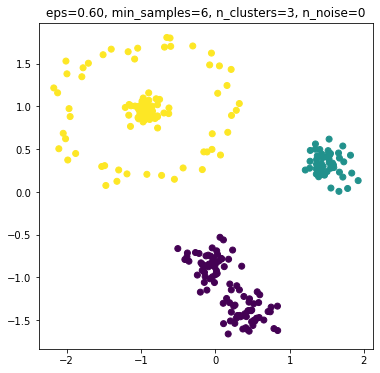

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.60, min_samples=7, n_clusters=3, n_noise=0')

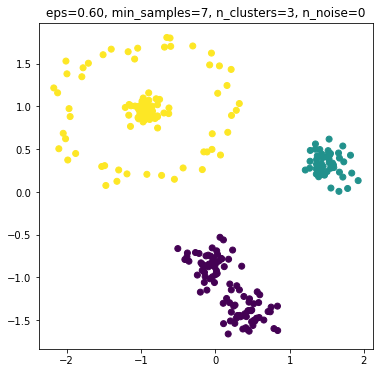

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.60, min_samples=8, n_clusters=3, n_noise=0')

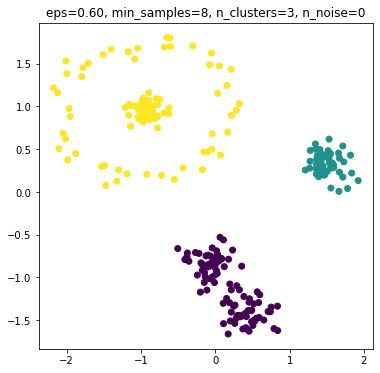

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.60, min_samples=9, n_clusters=3, n_noise=0')

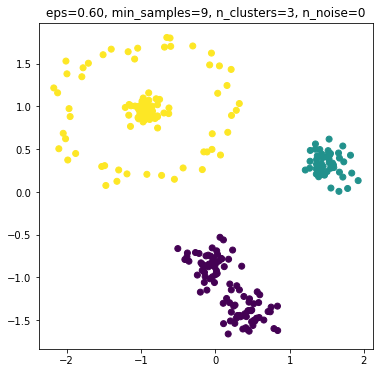

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.70, min_samples=2, n_clusters=3, n_noise=0')

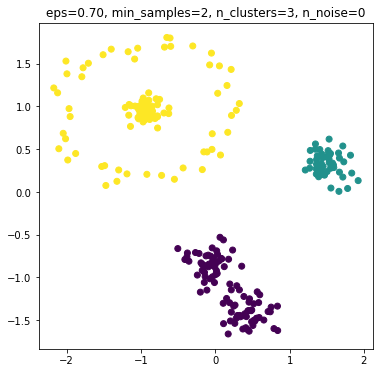

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.70, min_samples=3, n_clusters=3, n_noise=0')

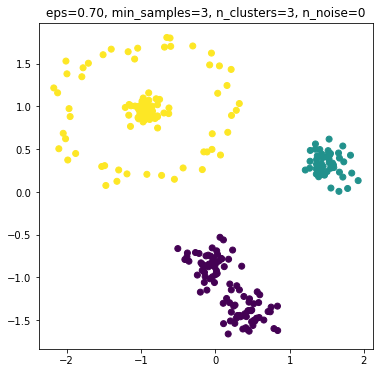

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.70, min_samples=4, n_clusters=3, n_noise=0')

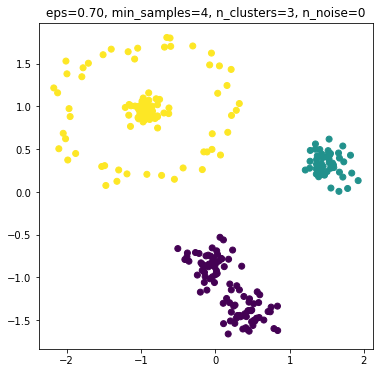

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.70, min_samples=5, n_clusters=3, n_noise=0')

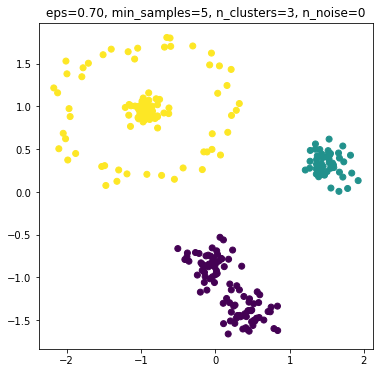

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.70, min_samples=6, n_clusters=3, n_noise=0')

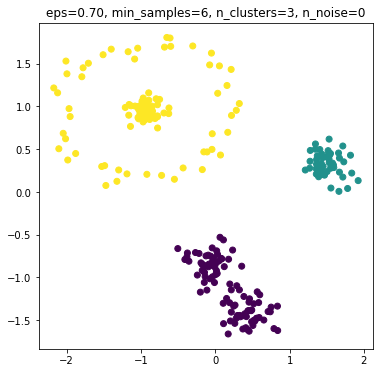

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.70, min_samples=7, n_clusters=3, n_noise=0')

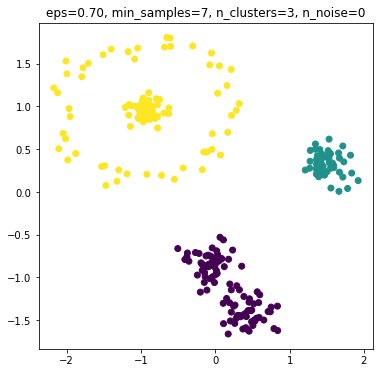

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.70, min_samples=8, n_clusters=3, n_noise=0')

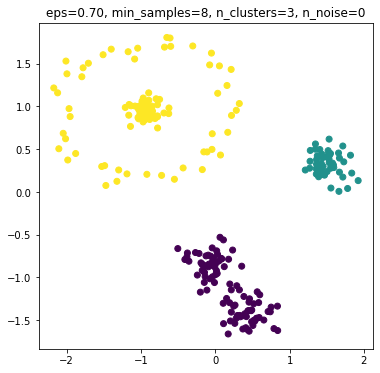

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.70, min_samples=9, n_clusters=3, n_noise=0')

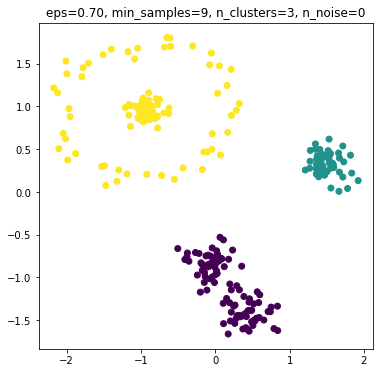

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.80, min_samples=2, n_clusters=3, n_noise=0')

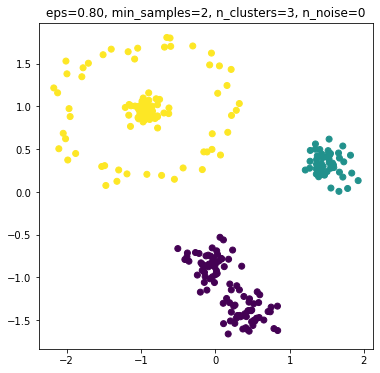

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.80, min_samples=3, n_clusters=3, n_noise=0')

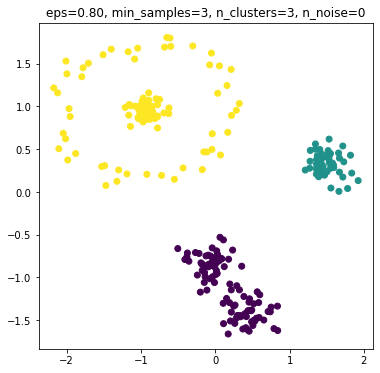

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.80, min_samples=4, n_clusters=3, n_noise=0')

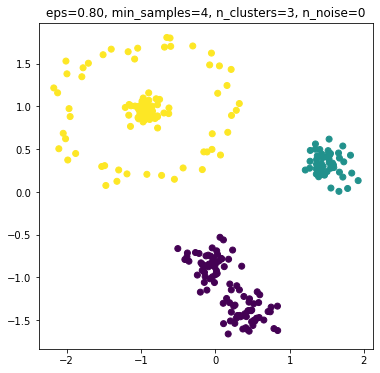

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.80, min_samples=5, n_clusters=3, n_noise=0')

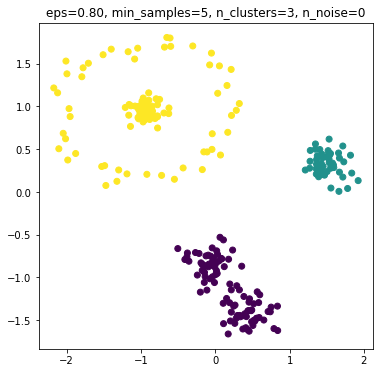

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.80, min_samples=6, n_clusters=3, n_noise=0')

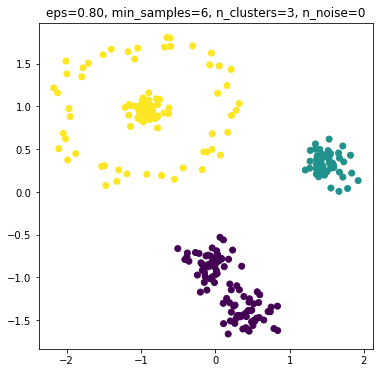

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.80, min_samples=7, n_clusters=3, n_noise=0')

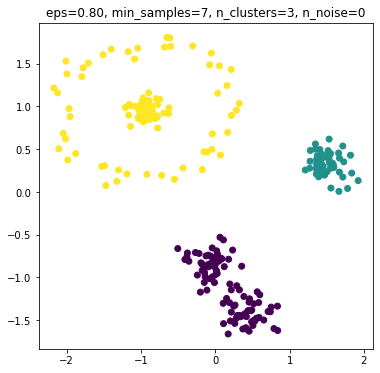

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.80, min_samples=8, n_clusters=3, n_noise=0')

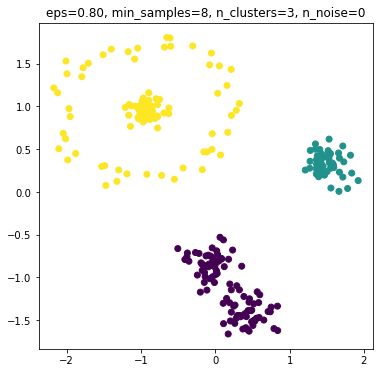

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.80, min_samples=9, n_clusters=3, n_noise=0')

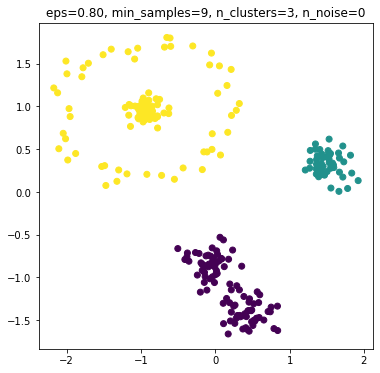

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.90, min_samples=2, n_clusters=2, n_noise=0')

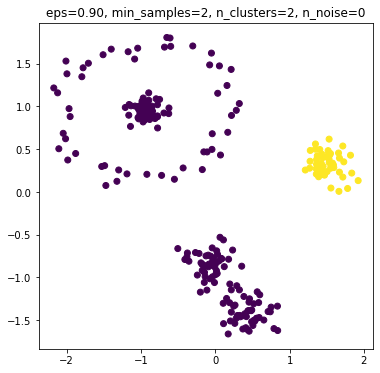

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.90, min_samples=3, n_clusters=2, n_noise=0')

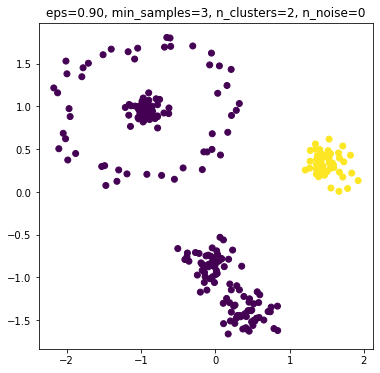

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.90, min_samples=4, n_clusters=2, n_noise=0')

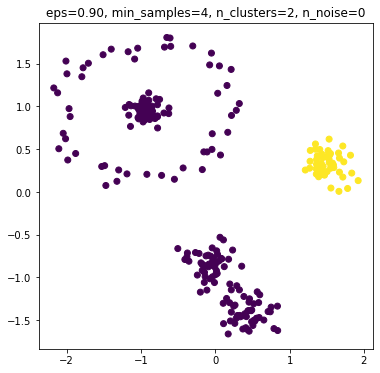

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.90, min_samples=5, n_clusters=2, n_noise=0')

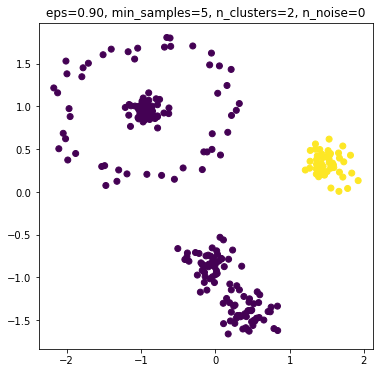

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.90, min_samples=6, n_clusters=2, n_noise=0')

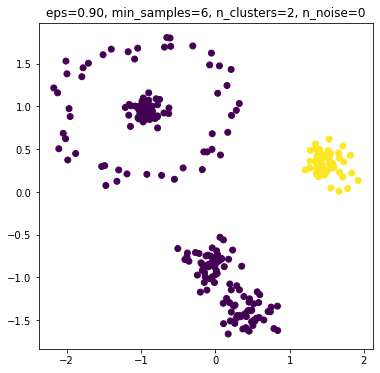

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.90, min_samples=7, n_clusters=2, n_noise=0')

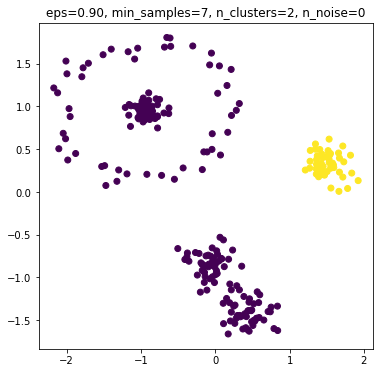

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.90, min_samples=8, n_clusters=2, n_noise=0')

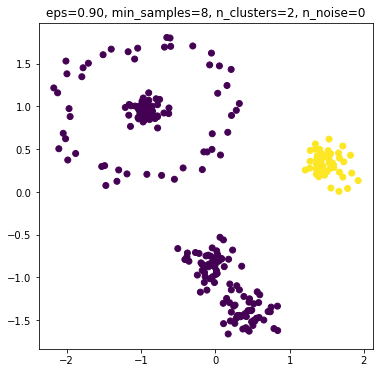

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=0.90, min_samples=9, n_clusters=2, n_noise=0')

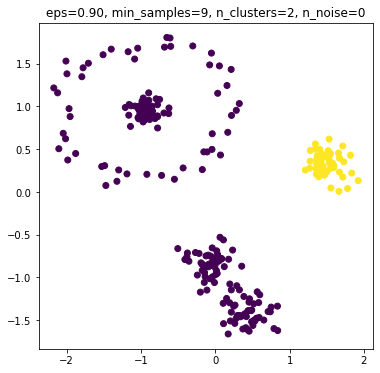

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=1.00, min_samples=2, n_clusters=2, n_noise=0')

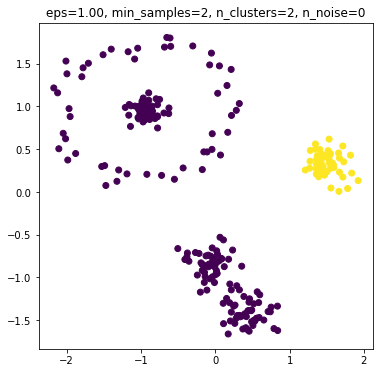

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=1.00, min_samples=3, n_clusters=2, n_noise=0')

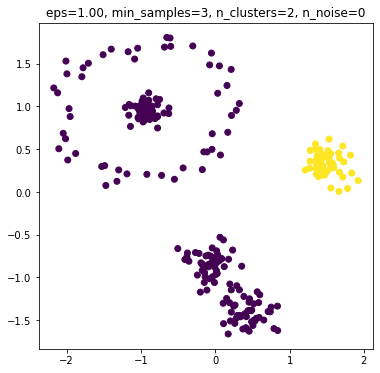

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=1.00, min_samples=4, n_clusters=2, n_noise=0')

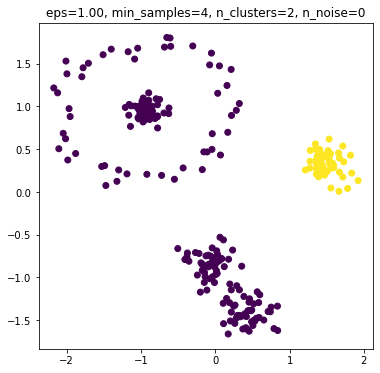

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=1.00, min_samples=5, n_clusters=2, n_noise=0')

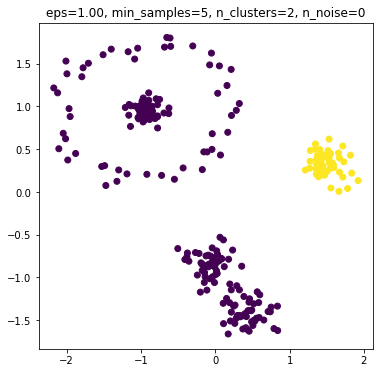

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=1.00, min_samples=6, n_clusters=2, n_noise=0')

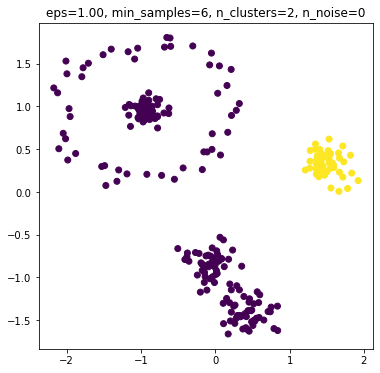

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=1.00, min_samples=7, n_clusters=2, n_noise=0')

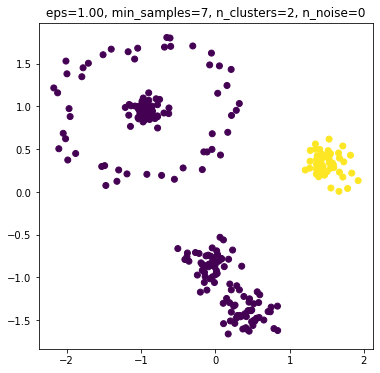

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=1.00, min_samples=8, n_clusters=2, n_noise=0')

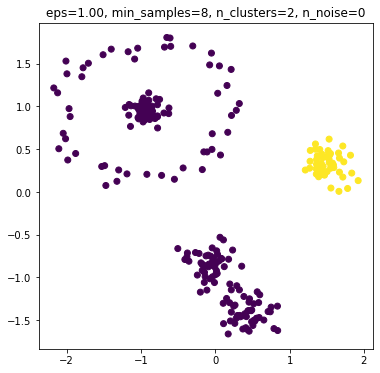

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=1.00, min_samples=9, n_clusters=2, n_noise=0')

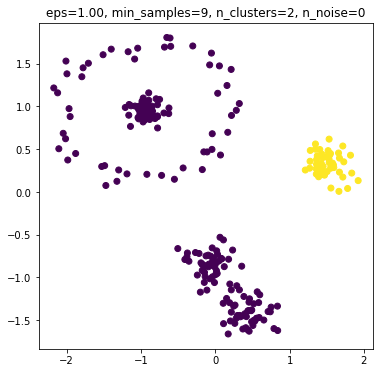

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=1.10, min_samples=2, n_clusters=2, n_noise=0')

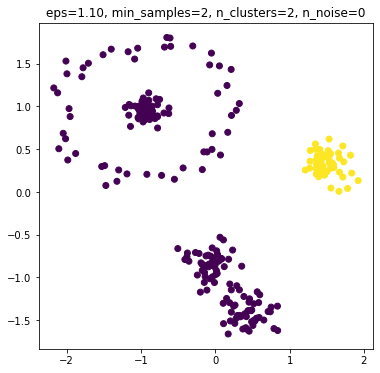

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=1.10, min_samples=3, n_clusters=2, n_noise=0')

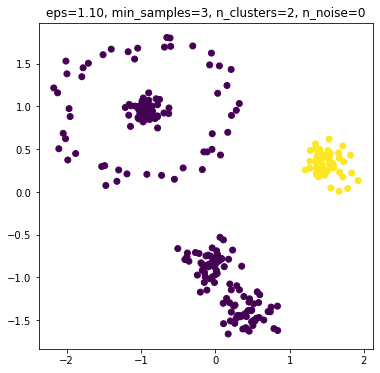

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=1.10, min_samples=4, n_clusters=2, n_noise=0')

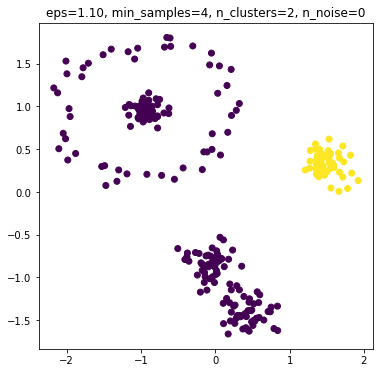

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=1.10, min_samples=5, n_clusters=2, n_noise=0')

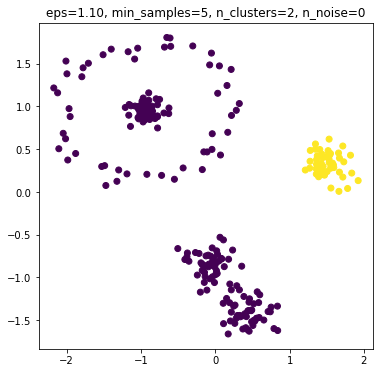

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=1.10, min_samples=6, n_clusters=2, n_noise=0')

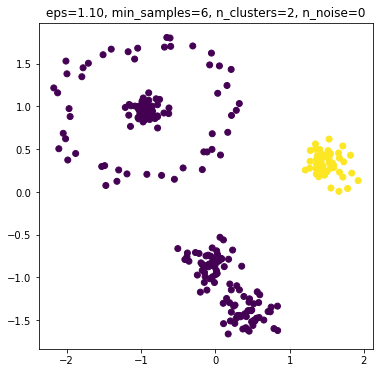

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=1.10, min_samples=7, n_clusters=2, n_noise=0')

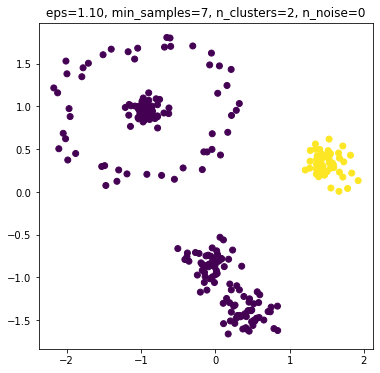

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=1.10, min_samples=8, n_clusters=2, n_noise=0')

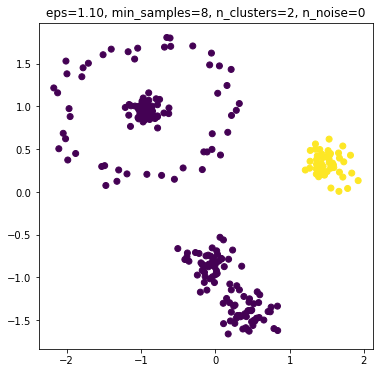

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'eps=1.10, min_samples=9, n_clusters=2, n_noise=0')

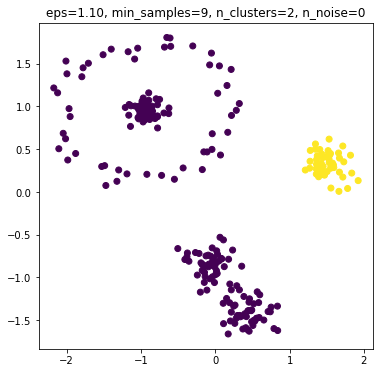

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [22]:
# Define the range of hyperparameter values to test
eps_values = np.linspace(0.1, 2.0, 20)
min_samples_values = range(2, 10)

# Loop over all combinations of hyperparameter values
for eps in eps_values:
    for min_samples in min_samples_values:
        # Fit a DBSCAN model to the data
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        # Compute evaluation metrics
        silhouette_score = metrics.silhouette_score(X, labels)
        # Plot the clustering results
        plt.figure(figsize=(6, 6))
        plt.scatter(X[:, 0], X[:, 1], c=labels)
        plt.title(f"eps={eps:.2f}, min_samples={min_samples}, n_clusters={n_clusters}, n_noise={n_noise}")
        plt.show()

<font color='red'>Question 2.10:</font> How does **DBSCAN** work?

Density-based spatial clustering of applications with noise (DBSCAN) is a well-known data clustering algorithm

Based on a set of points (let’s think in a bidimensional space as exemplified in the figure), DBSCAN groups together points that are close to each other based on a distance measurement (usually Euclidean distance) and a minimum number of points. It also marks as outliers the points that are in low-density regions.

The DBSCAN algorithm basically requires 2 parameters:

eps: specifies how close points should be to each other to be considered a part of a cluster. It means that if the distance between two points is lower or equal to this value (eps), these points are considered neighbors.

minPoints: the minimum number of points to form a dense region. For example, if we set the minPoints parameter as 5, then we need at least 5 points to form a dense region.

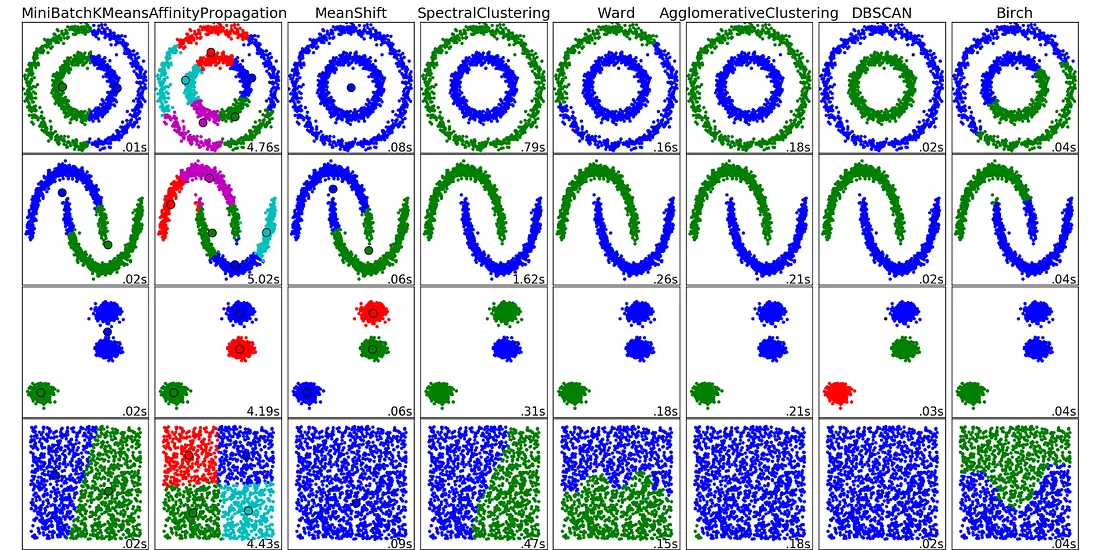

<font color='red'>Question 2.11:</font> What are the important hyperparameters for **DBSCAN**? How do they affect results?

eps: if the eps value chosen is too small, a large part of the data will not be clustered. It will be considered outliers because don’t satisfy the number of points to create a dense region. On the other hand, if the value that was chosen is too high, clusters will merge and the majority of objects will be in the same cluster. The eps should be chosen based on the distance of the dataset (we can use a k-distance graph to find it), but in general small eps values are preferable.

min_samples - the minimum number of points in a neighborhood for it to be considered a core point. This parameter controls the density of the clusters. A larger value of min_samples means that clusters will be more dense and require more points to be considered a cluster, while a smaller value of min_samples will lead to more sparse clusters.If the value of min_samples is too small, it may result in small or poorly defined clusters that are not meaningful.

<font color='red'>Question 2.12:</font> Do we need to set the number of clusters in **DBSCAN**? Why or why not?

DBSCAN is a density-based clustering algorithm that determines the number of clusters based on the density of the data. DBSCAN identifies clusters as areas of high density separated by areas of low density, without any prior number of clusters.

It uses two important hyperparameters, eps (epsilon) and min_samples, to identify clusters based on density. eps determines the maximum distance between two points for them to be considered as part of the same cluster, while min_samples determines the minimum number of points required to form a dense region (i.e., a cluster).

DBSCAN can automatically detect the number of clusters and does not require the user to specify the number of clusters beforehand. This is a significant advantage over other clustering algorithms, such as k-means or hierarchical clustering, where the number of clusters needs to be specified in advance.